# Genders through the lens of newspapers

This research case examines how European newspapers have contributed to shaping public understandings of the women’s movement and feminism. 

***- How did visual and textual representations of feminist activism circulate across Western Europe, and how did these representations evolve over time within the press?***

***- How to examine multimodal and crosslingual sources, using Impresso’s image and text embeddings, pre-trained models, and Python library?***

Our demo corpus is drawn from digitised newspapers embbeded in the Impresso covering a diverse set of publications from the late 19th to the mid-20th century. 
The corpus includes both textual articles and associated images, providing a multimodal perspective on feminist discourse. 
Its historical breadth captures major waves of feminist mobilisation, suffrage campaigns, and portraits of famous women figures.

Our demo is divided in **two sections**:

**1. Visual representations: analysing the image corpus**

Using computer vision models, we analyse patterns in visual representation, such as recurring motifs, stereotypical portrayals, and iconic imagery that became central to narratives about women’s rights. 
This visual exploration allows us to understand which images gained visibility, how they were framed within articles, and how these representations changed alongside political moments or public debates.

**2. Textual representation: analysing discourse**

In a second step, we turn to textual material to examine mentions of figures associated with the women’s movement—activists, organisations, institutions, and political actors. 
Through Impreso embeddings and NLP techniques, we study how these actors appear in the media, how frequently they are mentioned, in what contexts, and alongside whom. 



# Configuration

[Impresso python library](https://impresso.github.io/impresso-py/) is designed to facilitate interaction with the Impresso dataset. It offers a comprehensive set of classes for API interaction and a variety of tools to streamline data manipulation and analysis.

- Access to [DataContainer](https://impresso.github.io/impresso-py/result/#impresso.data_container.DataContainer) to get information on the API parameters and results;
- Access to [Resources](https://impresso.github.io/impresso-py/resources/) to get information on the library's main functionalities and parameters;
- Access to [Queries](https://impresso.github.io/impresso-py/preparing_queries/) to get information on how to create a search queries with complexe facets.



In [107]:
# Connecting to Impresso API:

!pip install --force-reinstall git+https://github.com/impresso/impresso-py.git@embeddings-search

from impresso import connect, DateRange, AND, OR
impresso = connect("https://dev.impresso-project.ch/public-api/v1")


  Cloning https://github.com/impresso/impresso-py.git (to revision embeddings-search) to /private/var/folders/js/4wp3h3cn5f14qwd0y99th4y00000gn/T/pip-req-build-xu39eklb
  Running command git clone --filter=blob:none --quiet https://github.com/impresso/impresso-py.git /private/var/folders/js/4wp3h3cn5f14qwd0y99th4y00000gn/T/pip-req-build-xu39eklb
  Running command git checkout -b embeddings-search --track origin/embeddings-search
  Switched to a new branch 'embeddings-search'
  branch 'embeddings-search' set up to track 'origin/embeddings-search'.
  Resolved https://github.com/impresso/impresso-py.git to commit 903d1136da964a23b1fd602d523017564e3702af
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyJWT-2.10.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)


In [108]:
# General libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import torch
from sentence_transformers import SentenceTransformer

# Creating dataset with image and text embeddings

Impresso offers various ways to collect and create a dataset with image and text embeddings: through the **Impresso Web App** and/or the **Python library**.
> To visualise the image: "https://dev.impresso-project.ch/app/search/images/" + "uid"

> To visualise the newspaper issue: "https://dev.impresso-project.ch/app/issue/" + "issueUid"

## 1. Embedded image-text search with Impresso web app

(Cf. Impresso dev environment)

## 2. Embedded image-text search with Impresso python library

The Python library currently allows the following search:

1. Search images with ```search tool``` (keywords, uid, etc.);

2. Search images with ```embeddings``` (embedded text or image);

3. Search images with ```external sources``` (URL, other images, etc.).

Let's see the examples below!


In [135]:
#1. Search with keyword:
result = impresso.images.find(term=("féministe"))
result

,issueUid,previewImage,date,caption,pageNumbers,mediaSourceRef.uid,mediaSourceRef.name,mediaSourceRef.type,imageTypes.visualContent,imageTypes.visualContentType,previewUrl,contentItemUid
uid,,,,,,,,,,,,
excelsior-1913-03-09-a-i0098,excelsior-1913-03-09-a,,1913-03-09,L'ERE FEMINISTE,[8],excelsior,Excelsior,newspaper,Image,Illustrated Story,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4601989d/f8/622,2124,1111,769/max/0/default.jpg",nan
excelsior-1914-01-18-a-i0098,excelsior-1914-01-18-a,,1914-01-18,MEETING FEMINISTE,[8],excelsior,Excelsior,newspaper,Image,Human Representation - Scene,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4602121c/f8/3252,2566,1219,1007/max/0/default.jpg",nan
luxland-1976-10-22-a-i0102,luxland-1976-10-22-a,,1976-10-22,La féministe...,[9],luxland,d'Letzeburger Land,newspaper,Image,Human Representation - Portrait,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2f436vxb%2fpages%2f9/131,851,1282,1772/max/0/default.jpg",nan


In [110]:
#2. Search with multimodal embedding:
impresso.images.find(
  embedding=impresso.tools.embed_text(text="les suffragettes", target="multimodal"),
  limit=5
)


,issueUid,previewImage,date,caption,pageNumbers,mediaSourceRef.uid,mediaSourceRef.name,mediaSourceRef.type,imageTypes.visualContent,imageTypes.visualContentType,previewUrl,contentItemUid
uid,,,,,,,,,,,,
luxland-1978-12-29-a-i0059,luxland-1978-12-29-a,,1978-12-29,Oculi — Bald kommen sie!,[12],luxland,d'Letzeburger Land,newspaper,Image,Caricature or Humoristic Drawing,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2fz9hsk5%2fpages%2f12/874,707,1965,1739/max/0/default.jpg",nan
IMP-1957-12-19-a-i0018,IMP-1957-12-19-a,,1957-12-19,nan,[2],IMP,L'Impartial,newspaper,Image,Caricature or Humoristic Drawing,"https://dev.impresso-project.ch/media/iiif/IMP-1957-12-19-a-p0002/1023,2061,364,305/max/0/default.jpg",IMP-1957-12-19-a-i0013
lepetitparisien-1927-07-15-a-i0076,lepetitparisien-1927-07-15-a,,1927-07-15,Les Marianne» de Fariß sur les marches de l'Opéra,[2],lepetitparisien,Le Petit Parisien,newspaper,Image,Human Representation - Scene,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k6069079/f2/775,369,1303,887/max/0/default.jpg",nan


In [111]:
#3. Search with embedded external sources:
impresso.tools.embed_image(
    image="https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4602121c/f8/3252,2566,1219,1007/max/0/default.jpg", target="image")

impresso.images.find(
  embedding=impresso.tools.embed_image(image="https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4602121c/f8/3252,2566,1219,1007/max/0/default.jpg", target="image"),
  limit=3
)

,issueUid,previewImage,date,caption,pageNumbers,mediaSourceRef.uid,mediaSourceRef.name,mediaSourceRef.type,imageTypes.visualContent,previewUrl,imageTypes.visualContentType
uid,,,,,,,,,,,
excelsior-1914-01-18-a-i0098,excelsior-1914-01-18-a,,1914-01-18,MEETING FEMINISTE,[8],excelsior,Excelsior,newspaper,Image,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4602121c/f8/3252,2566,1219,1007/max/0/default.jpg",Human Representation - Scene
lepetitparisien-1925-05-07-a-i0088,lepetitparisien-1925-05-07-a,,1925-05-07,Untitled,[1],lepetitparisien,Le Petit Parisien,newspaper,Image,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k6061086/f1/817,4856,618,1137/max/0/default.jpg",Human Representation - Scene
lepetitparisien-1926-09-14-a-i0088,lepetitparisien-1926-09-14-a,,1926-09-14,"Notre cliché représente. de gauche i droite : Bibendnm, capitaine des pompiers, G6o et ia mariée, M"""" Rolande Valdor, pendant la cérémonie",[1],lepetitparisien,Le Petit Parisien,newspaper,Image,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k606603v/f1/3209,5619,946,1029/max/0/default.jpg",Human Representation - Scene


## 3. Search through embedded text

In [112]:
# Embdding keywords or chunks of text

text = """
    feminism, feminist, suffragettes, 
    """

text_space_embedding = impresso.tools.embed_text(text=text, target="text")
text_space_embedding

'gte-768:VVxSvtHwgTzjYIM8RMu4vHZFnb2fS3690RBMvKs3xLzAdk49SwvYvOHLeb1N2+k6xuyGvSy5yjztL5W94RjkPLqFCD6OF5a906PIPVai2bxivpQ9iXSRPTBWF72Ng3A9Nn5/PHRtjj2QW8w9+sTcvPX29DpD1Vk8j2QlvYArMT3GoHA8DPsKvQpmej3Sxuc88lkiPdFIaj2v/pe7YBPNvB4lOrw4sbA8YB41u8Jh3zyB05K9bv94PJUQj7zCxv88SWK6ui1oMj0DqBU8poVfPdI8/jwZC9O8TqLwPBIPEj1u6lu9m/AivJ31jD3oPrK6H1uYvF8BGbuNt4m8guvQOigtw7wSJIK8XonfPIVXWLyvyOE9hA+7PJVpvLt1Ew0+0PIwvN9y3jzR+Im8mMqnPT8v1bwAh6I8SVoLu59C1jtc2dO7kaCtvP66CT1QsSU93n8HvFd7Pjwn1eg7J3K9PCLJCb2bunm8jTdzPdtNvLxw9cs8hhuHvVtn5Tj6JVu70+tcPHqs1rxxRQQ9T4UYPRYi0Dvc2VI9/iipPJy7eb0NVBI9HUETvZjWeLw3ZZU8R0M0vbjdwT0JgUq95VwXvdsfVr1TQqm8Y9otvS3gCz09vJ+7YQHzvDYrhT3D6QQ9TgMfvD1WKb1rHz69fVJlPJZhdr2XmII8w2oTveUypL3bOte7qV0gvXAYZj3BO0c9ng5pvKI/sbw+Q2g8CaWbvDNFHzzoSa890NczvMqe+rudpOo6UkPNOwIsjb0y1Yw8X3y3u6J4Y70feE+9xdt5PP9jxTsARYU9OaoKvTp/8DvWTVI91tSVvQKYuLono+68FGZfPXbsUj0HqIS9QfmjOSDdeD0yufk8I5MUvF4ViDuIJbe7iCievOCUxry09R49x3asParhZrzWI9O8iX2RPHmC/jyT5z+7Gz7Pu4nt6bw6a/M8Pw6gPaKsf7ua1D48gPd9vEMCmr1QA0W91OiCvAx4Kj3XjQI

In [113]:
# Search through embedded text

result_text = impresso.search.find(
  embedding=text_space_embedding,
  limit=5,
  include_embeddings=True,
)

result_text

,copyrightStatus,type,sourceMedium,title,topics,embeddings,transcriptLength,totalPages,languageCode,isOnFrontPage,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
lafronde-1926-10-13-a-i0061,in_cpy,ar,print,Historique et Tendances du mouvement suffragis...,"[{'uid': 'tm-fr-all-v2.0_tp88_fr', 'relevance'...",[gte-768:Wf8KvoyvID3dNyG9Al7XvPmXAL7TXIq9TATiv...,164,1,fr,False,...,[3],[],"[{'uid': '2-54-France', 'count': 1}]",[],[],[],"[{'surfaceForm': 'France', 'mentionConfidence'...","[{'surfaceForm': 'Mme Suzanne Grinberg', 'ment...",[],[]
GDL-1913-07-12-a-i0012,in_cpy,ar,print,Derrière le voile des suffragettes.,"[{'uid': 'tm-fr-all-v2.0_tp37_fr', 'relevance'...",[gte-768:gP8kvip9XD2CJ708ZLfROHOrW705cKW9GpG4v...,824,1,fr,False,...,[2],[],"[{'uid': '2-54-Londres', 'count': 1}]",[],"[{'uid': '2-53-Chambre_des_communes', 'count':...",[],"[{'surfaceForm': 'Londres', 'mentionConfidence...","[{'surfaceForm': 'Mrs Pankhurst', 'mentionConf...","[{'surfaceForm': 'Compagnie Marconi', 'mention...",[]
lafronde-1926-06-05-a-i0054,in_cpy,ar,print,Historique et Tendances du mouvement suffragis...,"[{'uid': 'tm-fr-all-v2.0_tp88_fr', 'relevance'...",[gte-768:JrYQvtnyHz3TAgm9+eDRvFia970ICpG9Jnr8v...,164,1,fr,False,...,[4],[],"[{'uid': '2-54-France', 'count': 1}]",[],[],[],"[{'surfaceForm': 'France', 'mentionConfidence'...","[{'surfaceForm': 'Mme Suzanne Grinberg', 'ment...",[],[]


> To visualise those result on the Impresso Web App, add "dev" to the link as we are working on the embeddings in dev.

# Data analysis with Impresso python library

In [137]:
# Adding result in dataframe
data_image = result.df
data_image = data_image.reset_index(drop=False)
data_image.head(10)

,uid,issueUid,previewImage,date,caption,pageNumbers,mediaSourceRef.uid,mediaSourceRef.name,mediaSourceRef.type,imageTypes.visualContent,imageTypes.visualContentType,previewUrl,contentItemUid
0,excelsior-1913-03-09-a-i0098,excelsior-1913-03-09-a,,1913-03-09,L'ERE FEMINISTE,[8],excelsior,Excelsior,newspaper,Image,Illustrated Story,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4601989d/f8/622,2124,1111,769/max/0/default.jpg",nan
1,excelsior-1914-01-18-a-i0098,excelsior-1914-01-18-a,,1914-01-18,MEETING FEMINISTE,[8],excelsior,Excelsior,newspaper,Image,Human Representation - Scene,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4602121c/f8/3252,2566,1219,1007/max/0/default.jpg",nan
2,luxland-1976-10-22-a-i0102,luxland-1976-10-22-a,,1976-10-22,La féministe...,[9],luxland,d'Letzeburger Land,newspaper,Image,Human Representation - Portrait,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2f436vxb%2fpages%2f9/131,851,1282,1772/max/0/default.jpg",nan
3,actionfem-1932-03-15-a-i0018,actionfem-1932-03-15-a,,1932-03-15,Cliché «Mouvement Féministe.»,[7],actionfem,L'Action féminine,newspaper,Image,Human Representation - Portrait,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2fftm30f%2fpages%2f7/106,804,832,1078/max/0/default.jpg",nan
4,actionfem-1932-03-15-a-i0017,actionfem-1932-03-15-a,,1932-03-15,Cliché «Mouvement Féministe».,[5],actionfem,L'Action féminine,newspaper,Image,Human Representation - Scene,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2fftm30f%2fpages%2f5/144,236,1675,1097/max/0/default.jpg",nan
5,marieclaire-1937-12-10-a-i0116,marieclaire-1937-12-10-a,,1937-12-10,"MARIA DERAISMES (1828-1894) féministe française,",[15],marieclaire,Marie-Claire,newspaper,Image,Human Representation - Scene,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4701152v/f15/4438,3371,670,1074/max/0/default.jpg",nan
6,lematin-1904-06-15-a-i0081,lematin-1904-06-15-a,,1904-06-15,MME SI)SAN B. ANTHONY Doyenne du congrès féministe,[1],lematin,Le Matin,newspaper,Image,Human Representation - Portrait,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k559642p/f1/2565,4020,664,744/max/0/default.jpg",nan
7,oeuvre-1938-02-13-a-i0015,oeuvre-1938-02-13-a,,1938-02-13,"UNE VICTOIRE FEMINISTE, UNE VICTOIRE DE "" L'ŒUVRE "" : La femme mariee n'est plus mineure",[2],oeuvre,L'Œuvre (Paris),newspaper,Image,Illustrated Story,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k46208380/f2/2181,1817,1752,1232/max/0/default.jpg",nan
8,oeuvre-1929-05-15-a-i0024,oeuvre-1929-05-15-a,,1929-05-15,"— Non, mais ! est-ce que par ità.sard vous me prendriez pour une féministe ?",[2],oeuvre,L'Œuvre (Paris),newspaper,Image,Caricature or Humoristic Drawing,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4617781j/f2/2282,7171,898,849/max/0/default.jpg",nan
9,lematin-1906-06-17-a-i0108,lematin-1906-06-17-a,,1906-06-17,Lady Aberdeen LA VICE-REINE D'IRLANDE ET LES PRÉSIDENTES DU CONSEIL FÉMINISTE A L'HOTEL DE VILLE,[2],lematin,Le Matin,newspaper,Image,Human Representation - Scene,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k5680011/f2/1779,3371,1485,1494/max/0/default.jpg",nan


In [ ]:
data_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     5 non-null      object 
 1   copyrightStatus         5 non-null      object 
 2   type                    5 non-null      object 
 3   sourceMedium            5 non-null      object 
 4   title                   5 non-null      object 
 5   topics                  5 non-null      object 
 6   embeddings              5 non-null      object 
 7   transcriptLength        5 non-null      int64  
 8   totalPages              5 non-null      int64  
 9   languageCode            5 non-null      object 
 10  isOnFrontPage           5 non-null      bool   
 11  publicationDate         5 non-null      object 
 12  issueUid                5 non-null      object 
 13  countryCode             5 non-null      object 
 14  providerCode            5 non-null      object

In [ ]:
data_image.columns

Index(['uid', 'copyrightStatus', 'type', 'sourceMedium', 'title', 'topics',
       'embeddings', 'transcriptLength', 'totalPages', 'languageCode',
       'isOnFrontPage', 'publicationDate', 'issueUid', 'countryCode',
       'providerCode', 'mediaUid', 'mediaType', 'hasOLR', 'ocrQualityScore',
       'relevanceScore', 'pageNumbers', 'collectionUids', 'entities.locations',
       'entities.persons', 'entities.organisations', 'entities.newsAgencies',
       'mentions.locations', 'mentions.persons', 'mentions.organisations',
       'mentions.newsAgencies'],
      dtype='object')

In [ ]:
# List of issue uids:
issue_uids = result.data_image['issueUid'].unique().tolist()
issue_uids


['excelsior-1913-03-09-a',
 'excelsior-1914-01-18-a',
 'luxland-1976-10-22-a',
 'actionfem-1932-03-15-a',
 'marieclaire-1937-12-10-a',
 'lematin-1904-06-15-a',
 'oeuvre-1938-02-13-a',
 'oeuvre-1929-05-15-a',
 'lematin-1906-06-17-a',
 'oeuvre-1934-12-16-a',
 'luxembourg1935-1938-05-26-a',
 'oeuvre-1932-06-22-a',
 'excelsior-1914-03-15-a',
 'JDG-1995-03-11-a',
 'oeuvre-1932-06-24-a',
 'oeuvre-1938-09-25-a',
 'lematin-1920-06-06-a',
 'oeuvre-1930-05-27-a',
 'oeuvre-1926-12-26-a',
 'oerennes-1930-11-21-a',
 'indeplux-1932-04-27-a',
 'excelsior-1914-03-30-a',
 'JDG-1993-07-23-a',
 'luxembourg1935-1936-04-30-a',
 'excelsior-1914-04-11-a',
 'excelsior-1914-05-12-b',
 'excelsior-1911-02-19-a',
 'excelsior-1913-01-01-a',
 'excelsior-1914-07-06-a',
 'excelsior-1911-11-23-a',
 'excelsior-1917-03-30-a',
 'lematin-1914-06-02-a',
 'excelsior-1920-06-09-a',
 'luxland-1998-06-26-a']

In [118]:
len(issue_uids)

34

In [119]:
# Seach for content items from the issues found above:
content_items = impresso.search.find(issue_id = OR(*issue_ids))
content_items

,copyrightStatus,type,sourceMedium,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,issueUid,...,collectionUids,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies,title,entities.locations,entities.persons,entities.organisations,entities.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
JDG-1993-07-23-a-i0055,in_cpy,ad,print,"[{'uid': 'tm-fr-all-v2.0_tp27_fr', 'relevance'...",65,1,fr,False,1993-07-23T00:00:00+00:00,JDG-1993-07-23-a,...,[],"[{'surfaceForm': 'Genève', 'mentionConfidence'...","[{'surfaceForm': 'Lombard', 'mentionConfidence...","[{'surfaceForm': 'Eurodollar', 'mentionConfide...",[],NaN,NaN,NaN,NaN,NaN
JDG-1993-07-23-a-i0179,in_cpy,ar,print,"[{'uid': 'tm-fr-all-v2.0_tp30_fr', 'relevance'...",37,1,fr,False,1993-07-23T00:00:00+00:00,JDG-1993-07-23-a,...,[],NaN,NaN,NaN,NaN,Rosa et Franz,NaN,NaN,NaN,NaN
JDG-1993-07-23-a-i0133,in_cpy,ad,print,"[{'uid': 'tm-fr-all-v2.0_tp15_fr', 'relevance'...",81,1,fr,False,1993-07-23T00:00:00+00:00,JDG-1993-07-23-a,...,[],"[{'surfaceForm': 'Quartier de Rive', 'mentionC...",[],"[{'surfaceForm': 'WBL', 'mentionConfidence': 3...",[],NaN,"[{'uid': '2-54-Lausanne', 'count': 1}]",[],[],[]


In [120]:
content_items = content_items.df
content_items.head(5)

,copyrightStatus,type,sourceMedium,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,issueUid,...,collectionUids,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies,title,entities.locations,entities.persons,entities.organisations,entities.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
JDG-1993-07-23-a-i0055,in_cpy,ad,print,"[{'uid': 'tm-fr-all-v2.0_tp27_fr', 'relevance'...",65,1,fr,False,1993-07-23T00:00:00+00:00,JDG-1993-07-23-a,...,[],"[{'surfaceForm': 'Genève', 'mentionConfidence'...","[{'surfaceForm': 'Lombard', 'mentionConfidence...","[{'surfaceForm': 'Eurodollar', 'mentionConfide...",[],NaN,NaN,NaN,NaN,NaN
JDG-1993-07-23-a-i0179,in_cpy,ar,print,"[{'uid': 'tm-fr-all-v2.0_tp30_fr', 'relevance'...",37,1,fr,False,1993-07-23T00:00:00+00:00,JDG-1993-07-23-a,...,[],NaN,NaN,NaN,NaN,Rosa et Franz,NaN,NaN,NaN,NaN
JDG-1993-07-23-a-i0133,in_cpy,ad,print,"[{'uid': 'tm-fr-all-v2.0_tp15_fr', 'relevance'...",81,1,fr,False,1993-07-23T00:00:00+00:00,JDG-1993-07-23-a,...,[],"[{'surfaceForm': 'Quartier de Rive', 'mentionC...",[],"[{'surfaceForm': 'WBL', 'mentionConfidence': 3...",[],NaN,"[{'uid': '2-54-Lausanne', 'count': 1}]",[],[],[]
JDG-1995-03-11-a-i0201,in_cpy,ar,print,"[{'uid': 'tm-fr-all-v2.0_tp96_fr', 'relevance'...",320,1,fr,False,1995-03-11T00:00:00+00:00,JDG-1995-03-11-a,...,[],NaN,NaN,NaN,NaN,Jeu de massacre au Victoria Hall,NaN,NaN,NaN,NaN
JDG-1995-03-11-a-i0202,in_cpy,ar,print,"[{'uid': 'tm-fr-all-v2.0_tp77_fr', 'relevance'...",506,1,fr,False,1995-03-11T00:00:00+00:00,JDG-1995-03-11-a,...,[],NaN,NaN,NaN,NaN,Ces images au charme mystérieux,NaN,NaN,NaN,NaN


In [121]:
content_items.columns

Index(['copyrightStatus', 'type', 'sourceMedium', 'topics', 'transcriptLength',
       'totalPages', 'languageCode', 'isOnFrontPage', 'publicationDate',
       'issueUid', 'countryCode', 'providerCode', 'mediaUid', 'mediaType',
       'hasOLR', 'ocrQualityScore', 'relevanceScore', 'pageNumbers',
       'collectionUids', 'mentions.locations', 'mentions.persons',
       'mentions.organisations', 'mentions.newsAgencies', 'title',
       'entities.locations', 'entities.persons', 'entities.organisations',
       'entities.newsAgencies'],
      dtype='object')

# Image analysis and visual representation

In this section, we want extract images from our **search result that appear on the frontpage**, and visualise the repartition of **image types classification**.

In [143]:
data_image = result.df.copy()
data_image.head(5)

,issueUid,previewImage,date,caption,pageNumbers,mediaSourceRef.uid,mediaSourceRef.name,mediaSourceRef.type,imageTypes.visualContent,imageTypes.visualContentType,previewUrl,contentItemUid
uid,,,,,,,,,,,,
excelsior-1913-03-09-a-i0098,excelsior-1913-03-09-a,,1913-03-09,L'ERE FEMINISTE,[8],excelsior,Excelsior,newspaper,Image,Illustrated Story,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4601989d/f8/622,2124,1111,769/max/0/default.jpg",nan
excelsior-1914-01-18-a-i0098,excelsior-1914-01-18-a,,1914-01-18,MEETING FEMINISTE,[8],excelsior,Excelsior,newspaper,Image,Human Representation - Scene,"https://gallica.bnf.fr/iiif/ark:/12148/bpt6k4602121c/f8/3252,2566,1219,1007/max/0/default.jpg",nan
luxland-1976-10-22-a-i0102,luxland-1976-10-22-a,,1976-10-22,La féministe...,[9],luxland,d'Letzeburger Land,newspaper,Image,Human Representation - Portrait,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2f436vxb%2fpages%2f9/131,851,1282,1772/max/0/default.jpg",nan
actionfem-1932-03-15-a-i0018,actionfem-1932-03-15-a,,1932-03-15,Cliché «Mouvement Féministe.»,[7],actionfem,L'Action féminine,newspaper,Image,Human Representation - Portrait,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2fftm30f%2fpages%2f7/106,804,832,1078/max/0/default.jpg",nan
actionfem-1932-03-15-a-i0017,actionfem-1932-03-15-a,,1932-03-15,Cliché «Mouvement Féministe».,[5],actionfem,L'Action féminine,newspaper,Image,Human Representation - Scene,"https://iiif.eluxemburgensia.lu/image/iiif/2/ark:70795%2fftm30f%2fpages%2f5/144,236,1675,1097/max/0/default.jpg",nan


In [144]:
# Extracting images published in the frontpage

data_image["pageNumbers"] = data_image["pageNumbers"].apply(lambda x: x[0] if isinstance(x, list) else None)

df_frontpage = data_image[data_image["pageNumbers"] == 1][["caption", "previewImage"]]
df_frontpage.head(7)


,caption,previewImage
uid,,
lematin-1904-06-15-a-i0081,MME SI)SAN B. ANTHONY Doyenne du congrès féministe,
oeuvre-1934-12-16-a-i0109,"(JfnotO fW!., Une délégation féministe de la « Femme Nouvelle » a été reçue hier à l'Hôtel de Ville.",
oeuvre-1932-06-22-a-i0136,"(Photo ŒUvre). La féministe au Sénat, An centre : M. LK SÉNATEUR LOUIS MARTIN et rwlrc collaboratricet Mme MAHIA .VLR.ONE",
oeuvre-1932-06-24-a-i0126,"(Photo Roi.). La propagande féministe : '. Mme LEHMANN, du haut d'un aviun"" a jeté hier sur Paris des tracts pouft le suffrage des lerhmes..",
lematin-1920-06-06-a-i0072,"LA CARTE FÉMINISTE DE L'EUROPE 11111 Pays où les femmes ont le droit de vote MMBM Pays où la question du vote, féminin a été posée",
oeuvre-1926-12-26-a-i0002,"(Photo Œuvre.) Une curieuse manifestation féministe '- a parcouru hier les rues de Paris, derrière un camion 'muni de haut-parleurs. (Voir l'article à' la 4° page.)",
oerennes-1930-11-21-a-i0143,"(Wlde World Photo). Mme Suat Dcrvish Hanum, femme de lettres turque, féministe ardente, vient d'arriver à Berlin, où elle va mener une enquête sur le rôle social et politique des Berlinoises.",


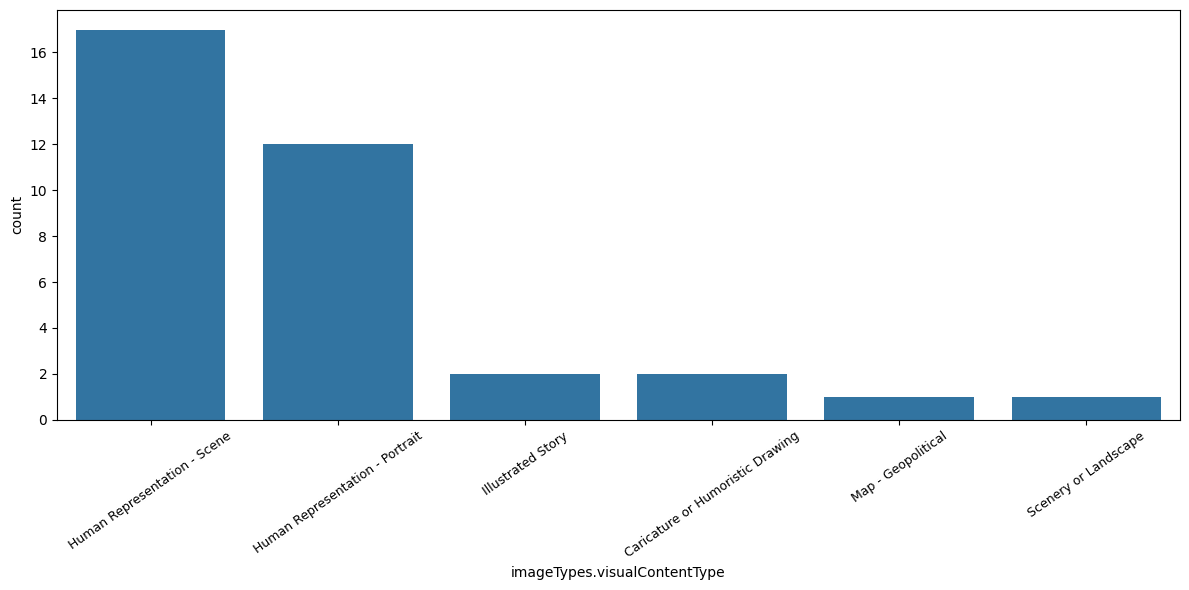

In [146]:
# Visualising image types classification

plt.figure(figsize=(12, 6))
sns.countplot(
    data=data_image, 
    x="imageTypes.visualContentType",
    order=data_image["imageTypes.visualContentType"].value_counts().index
)
plt.xticks(rotation=35, fontsize=9)
plt.tight_layout()
plt.show()

# 